# Expresiones regulares

In [1]:
# importando el modulo de regex de python
import re

<p>Para coincidir un patrón, se compila transformando en <b>bytecode</b>, este código luego se ejecuta por un motor escrito en C:</p>
<code>pattern = re.compile(r'\bfoo\b')</code>

<p>Si uno o mas caracteres coiniden con la expresión regular retorna un objeto <em>match</em>: <a href="https://docs.python.org/3/library/re.html#match-objects">Match Objects</a></p>

#### Formas de coincidir patrones y ejecutar las operaciones

In [2]:
# Si queremos volver a usar la expresión regular, podemos usar el siguiente código:
pattern = re.compile("<p>")
pattern.match("<p>Esta etiqueta está en el inicio de este texto</p>")

<re.Match object; span=(0, 3), match='<p>'>

#### Funciones no compiladas

Para cada uno de los ejemplos que veremos (<em>match, search, findall, finditer, split, sub y subn</em>) existe una versión al nivel del módulo que se puede utilizar sin necesidad de compilar primero el patrón de búsqueda; simplemente le pasamos como primer argumento la expresion regular y el resultado será el mismo. La ventaja que tiene la versión compila sobre las funciones no compiladas es que si vamos a utilizar la expresion regular dentro de un <em>bucle</em> nos vamos a ahorrar varias llamadas de funciones y por lo tanto mejorar la performance de nuestro programa.

In [3]:
# Por otro lado, podemos realizar directamente la operación en el módulo usando la siguiente línea de código:
re.match("<p>", "<p>Esta etiqueta está en el inicio de este texto</p>")

<re.Match object; span=(0, 3), match='<p>'>

## Buscando coincidencias

In [4]:
# compilando la regex
pattern = re.compile(r'\bfoo\b')  # busca la palabra foo

Ya tenemos el objeto de <em>expresión regular</em> compilado podemos utilizar alguno de los siguientes métodos para buscar coincidencias con nuestro texto.
<ul>
    <li><b>match():</b> El cual determinada si la regex tiene coincidencias en el comienzo del texto.Retorna <em>None</em> si no hay coincidencia.</li>
    <li><b>search():</b> El cual escanea todo el texto buscando cualquier ubicación donde haya una coincidencia.</li>
    <li><b>findall():</b> El cual encuentra todos los subtextos donde haya una coincidencia y nos devuelve estas coincidencias como una lista.</li>
    <li><b>finditer():</b> El cual es similar al anterior pero en lugar de devolvernos una lista nos devuelve un iterador en el que cada elemento es un <em>MatchObject</em>.</li>
</ul>

In [5]:
# texto de entrada
text = """ bar foo bar
foo barbarfoo
foofoo foo bar
"""

In [6]:
# match nos devuelve None porque no hubo coincidencia al comienzo del texto
print(pattern.match(text))

None


In [7]:
# match encuentra una coindencia en el comienzo del texto
m = pattern.match('foo bar barbarfoo')
m

<re.Match object; span=(0, 3), match='foo'>

In [8]:
# search nos devuelve la coincidencia en cualquier ubicacion.
s = pattern.search(text)
s

<re.Match object; span=(5, 8), match='foo'>

In [10]:
# findall nos devuelve una lista con todas las coincidencias
fa = pattern.findall(text)
fa

['foo', 'foo', 'foo']

In [11]:
# finditer nos devuelve un iterador
fi = pattern.finditer(text)
fi

In [12]:
# iterando por las distintas coincidencias
next(fi)

<re.Match object; span=(5, 8), match='foo'>

In [13]:
next(fi)

<re.Match object; span=(13, 16), match='foo'>

Como podemos ver en estos ejemplos, cuando hay coincidencias, Python nos devuelve un <em>Objeto de coincidencia</em> (salvo por el método <em>findall()</em> que devuelve una lista). Este <em>Objeto de coincidencia</em> también tiene sus propios métodos que nos proporcionan información adicional sobre la coincidencia; éstos métodos son:
<ul>
    <li><b>group():</b> El cual devuelve el texto que coincide con la expresion regular.</li>
    <li><b>start():</b> El cual devuelve la posición inicial de la coincidencia.</li>
    <li><b>end():</b> El cual devuelve la posición final de la coincidencia.</li>
    <li><b>span():</b> El cual devuelve una tupla con la posición inicial y final de la coincidencia.</li>
</ul>

In [24]:
# Métodos del objeto de coincidencia
m.group(), m.start(), m.end(), m.span()

('foo', 0, 3, (0, 3))

In [14]:
s.group(), s.start(), s.end(), s.span()

('foo', 5, 8, (5, 8))

## Modificando el texto de entrada

Además de buscar coincidencias de nuestro patrón de búsqueda en un texto, podemos utilizar ese mismo patrón para realizar modificaciones al texto de entrada. Para estos casos podemos utilizar los siguientes métodos:
<ul>
    <li><b>split():</b> El cual divide el texto en una lista, realizando las divisiones del texto en cada lugar donde se cumple con la expresion regular.</li>
    <li><b>sub():</b> El cual encuentra todos los subtextos donde existe una coincidencia con la expresion regular y luego los reemplaza con un nuevo texto.</li>
    <li><b>subn():</b> El cual es similar al anterior pero además de devolver el nuevo texto, también devuelve el numero de reemplazos que realizó.</li>
</ul>

In [15]:
# texto de entrada
becquer = """Podrá nublarse el sol eternamente; 
Podrá secarse en un instante el mar; 
Podrá romperse el eje de la tierra 
como un débil cristal. 
¡todo sucederá! Podrá la muerte 
cubrirme con su fúnebre crespón; 
Pero jamás en mí podrá apagarse 
la llama de tu amor."""

In [17]:
# patron para dividir donde no encuentre un caracter alfanumerico
pattern = re.compile(r'\W+')

In [19]:
words = pattern.split(becquer)
words[:15]  # 10 primeras palabras

['Podrá',
 'nublarse',
 'el',
 'sol',
 'eternamente',
 'Podrá',
 'secarse',
 'en',
 'un',
 'instante',
 'el',
 'mar',
 'Podrá',
 'romperse',
 'el']

In [39]:
# Utilizando la version no compilada de split.
re.split(r'\n', becquer)  # Dividiendo por linea.

['Podrá nublarse el sol eternamente; ',
 'Podrá secarse en un instante el mar; ',
 'Podrá romperse el eje de la tierra ',
 'como un débil cristal. ',
 '¡todo sucederá! Podrá la muerte ',
 'cubrirme con su fúnebre crespón; ',
 'Pero jamás en mí podrá apagarse ',
 'la llama de tu amor.']

In [40]:
# Utilizando el tope de divisiones
pattern.split(becquer, 5)

['Podrá',
 'nublarse',
 'el',
 'sol',
 'eternamente',
 'Podrá secarse en un instante el mar; \nPodrá romperse el eje de la tierra \ncomo un débil cristal. \n¡todo sucederá! Podrá la muerte \ncubrirme con su fúnebre crespón; \nPero jamás en mí podrá apagarse \nla llama de tu amor.']

In [23]:
print(becquer)

Podrá nublarse el sol eternamente; 
Podrá secarse en un instante el mar; 
Podrá romperse el eje de la tierra 
como un débil cristal. 
¡todo sucederá! Podrá la muerte 
cubrirme con su fúnebre crespón; 
Pero jamás en mí podrá apagarse 
la llama de tu amor.


In [20]:
# Cambiando "Podrá" o "podrá" por "Puede"
podra = re.compile(r'\b(P|p)odrá\b')
puede = podra.sub("Puede", becquer)
print(puede)

Puede nublarse el sol eternamente; 
Puede secarse en un instante el mar; 
Puede romperse el eje de la tierra 
como un débil cristal. 
¡todo sucederá! Puede la muerte 
cubrirme con su fúnebre crespón; 
Pero jamás en mí Puede apagarse 
la llama de tu amor.


In [24]:
# Limitando el número de reemplazos
puede = podra.sub("Puede", becquer, 2)
print(puede)

Puede nublarse el sol eternamente; 
Puede secarse en un instante el mar; 
Podrá romperse el eje de la tierra 
como un débil cristal. 
¡todo sucederá! Podrá la muerte 
cubrirme con su fúnebre crespón; 
Pero jamás en mí podrá apagarse 
la llama de tu amor.


In [25]:
# Utilizando la version no compilada de subn
re.subn(r'\b(P|p)odrá\b', "Puede", becquer)  # se realizaron 5 reemplazos

('Puede nublarse el sol eternamente; \nPuede secarse en un instante el mar; \nPuede romperse el eje de la tierra \ncomo un débil cristal. \n¡todo sucederá! Puede la muerte \ncubrirme con su fúnebre crespón; \nPero jamás en mí Puede apagarse \nla llama de tu amor.',
 5)

## Banderas de compilación

Las banderas de compilación permiten modificar algunos aspectos de cómo funcionan las expresiones regulares. Todas ellas están disponibles en el módulo <code>re</code> bajo dos nombres, un nombre largo como IGNORECASE y una forma abreviada de una sola letra como I. Múltiples banderas pueden ser especificadas utilizando el operador "<code>|</code>" OR; Por ejemplo, <code>re.I | RE.M</code> establece las banderas de E y M.

<p>Algunas de las banderas de compilación que podemos encontrar son:</p>
<ul>
    <li><b>IGNORECASE, I:</b> Para realizar búsquedas sin tener en cuenta las minúsculas o mayúsculas.</li>
    <li><b>VERBOSE, X:</b> Que habilita la modo verborrágico, el cual permite organizar el patrón de búsqueda de una forma que sea más sencilla de entender y leer.</li>
    <li><b>ASCII, A:</b> Que hace que las <a href="https://docs.microsoft.com/en-us/cpp/c-language/escape-sequences?redirectedfrom=MSDN&view=msvc-160">secuencias de escape</a> \w, \b, \s and \d funciones para coincidencias con los caracteres ASCII.</li>
    <li><b>DOTALL, S:</b> La cual hace que el metacaracter . funcione para cualquier caracter, incluyendo el las líneas nuevas.</li>
    <li><b>LOCALE, L:</b> Esta opción hace que <code>\w, \W, \b, \B, \s, y \S</code> dependientes de la localización actual.</li>
    <li><b>MULTILINE, M:</b> Que habilita la coincidencia en múltiples líneas, afectando el funcionamiento de los metacaracteres <code>^</code> and <code>$</code>.</li>
</ul>

In [48]:
# Ejemplo de IGNORECASE
# Cambiando "Podrá" o "podrá" por "Puede"
podra = re.compile(r'podrá\b', re.I)  # el patrón se vuelve más sencillo
puede = podra.sub("Puede", becquer)
print(puede)

Puede nublarse el sol eternamente; 
Puede secarse en un instante el mar; 
Puede romperse el eje de la tierra 
como un débil cristal. 
¡todo sucederá! Puede la muerte 
cubrirme con su fúnebre crespón; 
Pero jamás en mí Puede apagarse 
la llama de tu amor.


In [27]:
# Ejemplo de VERBOSE
mail = re.compile(r"""
\b             # comienzo de delimitador de palabra
[\w.%+-]       # usuario: Cualquier caracter alfanumerico mas los signos (.%+-)
+@             # seguido de @
[\w.-]         # dominio: Cualquier caracter alfanumerico mas los signos (.-)
+\.            # seguido de .
[a-zA-Z]{2,6}  # dominio de alto nivel: 2 a 6 letras en minúsculas o mayúsculas.
\b             # fin de delimitador de palabra
""", re.X)
# mx br co es com

In [ ]:
\b[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,6}\b

In [28]:
mails = """raul.lopez@relopezbriega.com, Raul Lopez Briega,
foo bar, relopezbriega@relopezbriega.com.ar, raul@github.io, 
https://relopezbriega.com.ar, https://relopezbriega.github.io, 
python@python, river@riverplate.com.ar, pythonAR@python.pythonAR
"""

In [29]:
# filtrando los mails con estructura válida
mail.findall(mails)

# Como podemos ver en este último ejemplo, la opción VERBOSE puede ser muy util para que  
# cualquier persona que lea nuestra expresion regular pueda entenderla más fácilmente.

['raul.lopez@relopezbriega.com',
 'relopezbriega@relopezbriega.com.ar',
 'raul@github.io',
 'river@riverplate.com.ar']

### Extras: Nombrando los grupos

Otra de las funciones interesantes que nos ofrece el módulo <a href="https://docs.python.org/3/library/re.html">re</a> de Python; es la posibilidad de ponerle nombres a los grupos de nuestras expresiones regulares. Así por ejemplo, en lugar de acceder a los grupos por sus índices, como en este caso...

In [30]:
# Accediendo a los grupos por sus indices
pattern = re.compile(r"(\w+) (\w+)")
s = pattern.search("Raul Lopez")
s, s.group()

(<re.Match object; span=(0, 10), match='Raul Lopez'>, 'Raul Lopez')

In [31]:
# grupo 1
s.group(1)

'Raul'

In [32]:
# grupo 2
s.group(2)

'Lopez'

Podemos utilizar la sintaxis especial <code>(?P< nombre >patron)</code> que nos ofrece Python para nombrar estos grupos y que sea más fácil identificarlos.

In [33]:
# Accediendo a los grupos por nombres
pattern = re.compile(r"(?P<nombre>\w+) (?P<apellido>\w+)")
s = pattern.search("Raúl López")

In [34]:
# grupo nombre
s.group("nombre")

'Raúl'

In [68]:
# grupo apellido
s.group("apellido")

'López'

## Ejemplos de expresiones regulares

### Validando mails

<p>Para validar que un mail tenga la estructura correcta, podemos utilizar la siguiente expresion regular:</p>

<b>regex:</b> <code>\b[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,6}\b</code>

<p>Este es el patrón que utilizamos en el ejemplo de la opción VERBOSE.</p>

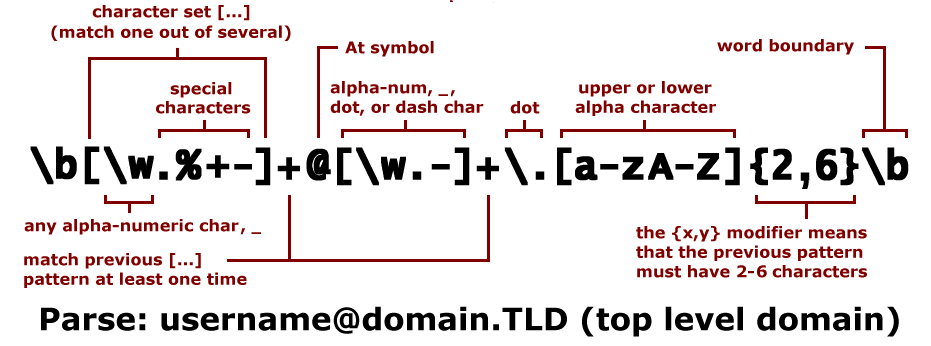

### Validando una URL

Para validar que una URL tenga una estructura correcta, podemos utilizar esta expresion regular:

<b>regex:</b> <code>^(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)*\/?$</code>

In [35]:
# Validando una URL
url = re.compile(r"^(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)*\/?$")

# vemos que https://relopezbriega.com.ar lo acepta como una url válida.
url.search("https://relopezbriega.com.ar")

<re.Match object; span=(0, 28), match='https://relopezbriega.com.ar'>

In [36]:
# pero https://google.com/un/archivo!.html no la acepta por el carcter !
print(url.search("https://google.com/un/archivo!.html"))

None


In [37]:
print(url.search("https://google.com/un/archivo.html"))

<re.Match object; span=(0, 34), match='https://google.com/un/archivo.html'>


### Validando una dirección IP

Para validar que una dirección IP tenga una estructura correcta, podemos utilizar esta expresión regular:

<b>regex:</b> <code>^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$</code>

In [73]:
# Validando una dirección IP
patron = ('^(?:(?:25[0-5]|2[0-4][0-9]|'
          '[01]?[0-9][0-9]?)\.){3}'
          '(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$')

ip = re.compile(patron)

# la ip 73.60.124.136 es valida
ip.search("73.60.124.136")

<re.Match object; span=(0, 13), match='73.60.124.136'>

In [74]:
# pero la ip 256.60.124.136 no es valida
print(ip.search("256.60.124.136"))

None


### Validando una fecha

Para validar que una fecha tenga una estructura dd/mm/yyyy, podemos utilizar esta expresión regular:

<b>regex:</b> <code>^(0?[1-9]|[12][0-9]|3[01])/(0?[1-9]|1[012])/((19|20)\d\d)$</code>

In [2]:
# Validando una fecha
p1_fecha = re.compile(r'^(0?[1-9]|[12][0-9]|3[01])/(0?[1-9]|1[012])/((19|20)\d\d)$')

# validando 13/02/1982
p1_fecha.search("13/02/1982")

<re.Match object; span=(0, 10), match='13/02/1982'>

In [3]:
# no valida 13-02-1982
print(p1_fecha.search("13-02-1982"))

None


In [4]:
# no valida 32/12/2015
print(p1_fecha.search("32/12/2015"))

None


In [5]:
# no valida 30/14/2015
print(p1_fecha.search("30/14/2015"))

None


## Caso de estudio: Expresiones regulares para fechas
#### Variaciones de fechas para 23 de Octubre de 2002

In [6]:
dateStr = '23-10-002\n23-10-2002\n23/10/2002\n23/10/02\n10/23/2002\n23 Oct 2002\n23 de Octubre de 2002\nOct 23, \
2002\nOctubre 23, 2002'
print(dateStr)

23-10-002
23-10-2002
23/10/2002
23/10/02
10/23/2002
23 Oct 2002
23 de Octubre de 2002
Oct 23, 2002
Octubre 23, 2002


1. A partir del patrón anterior, verificar si cada una de las fechas dadas cumplen o no con el mismo

2. Realice una expresión regular que extraiga las fechas con formatos numéricos:
<p> 23-10-002 23-10-2002 23/10/2002 23/10/02 10/23/2002</p>

3. Encuentre todas las fechas escritas en formato donde el mes aparece no numérico

4. ¿Qué sucede a las expresiones regulares del ejercicio 2 y 3, si sólo tenemos en el día un solo digito?

In [7]:
dateStr = dateStr + "\n1-10-2001\n1 Oct 2001"
print(dateStr)

23-10-002
23-10-2002
23/10/2002
23/10/02
10/23/2002
23 Oct 2002
23 de Octubre de 2002
Oct 23, 2002
Octubre 23, 2002
1-10-2001
1 Oct 2001


## Tarea

Se tiene un archivo (dates.txt) donde cada línea de este corresponde a una nota médica y cada nota tiene una fecha que debe extraerse, pero cada fecha está codificada en uno de muchos formatos. Por ejemplo, se muestra a continuación una lista de algunas de las variantes que se puede encontrar en este conjunto de datos:
<ul>
    <li>04/20/2009; 04/20/09; 4/20/09; 4/3/09</li>
    <li>Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009;</li>
    <li>20 Mar 2009; 20 March 2009; 20 Mar. 2009; 20 March, 2009</li>
    <li>Mar 20th, 2009; Mar 21st, 2009; Mar 22nd, 2009</li>
    <li>Feb 2009; Sep 2009; Oct 2010</li>
    <li>6/2008; 12/2009</li>
    <li>2009; 2010</li>
</ul>
La actividad consiste en:
<p>a). Identificar correctamente todas las diferentes variantes de fecha codificadas en este conjunto de datos, normalizar y ordenar adecuadamente las fechas.</p>
<p>b).	Una vez que haya extraído estos patrones de fecha del texto, el siguiente paso es clasificarlos en orden cronológico ascendente de acuerdo con las siguientes reglas:</p>
<ul>
    <li>Todas las fechas están en formato xx/xx/xx son mm/dd/aa</li>
    <li>Todas las fechas en las que el año está codificado en solo dos dígitos corresponden a años posteriores a la década de 1900 (p. Ej., 1/5/89 es el 5 de enero de 1989).</li>
    <li>Si falta el día (p. Ej., 9/2009), suponga que es el primer día del mes (p. Ej., septiembre, 1 de 2009).</li>
    <li>Si falta el mes (por ejemplo, 2010), suponga que es el primero de enero de ese año (p. Ej., enero, 1 de 2010).</li>
    <li>Tenga cuidado con los posibles errores tipográficos, ya que este es un conjunto de datos derivados de la vida real.</li>
</ul>
Esta función debería devolver una lista de longitud 500.
